In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patheffects as PathEffects

In [2]:
df = pd.read_csv('./cons_p/results2024-11-14_17:48:16.csv')

# Assuming `df` is the loaded DataFrame
# Step 1: Load data and split into two tables by "PPinv" column
dbm_table = df[df["PPinv"] == "DBM (UMAP_NNInv)"]
ssnp_table = df[df["PPinv"] == "SSNP"]

# Step 2: Define a function to pivot and reorganize the table
def reorganize_table(df):
    # Select necessary columns
    df = df[["Data", "Classifier", "$Cons_p$", "$Cons_p$ fast", "diff $Cons_p$"]]
    
    # Melt the table to create a row for each metric ($Cons_p$, $Cons_p$ fast, diff $Cons_p$)
    df_melted = df.melt(id_vars=["Data", "Classifier"], 
                        value_vars=["$Cons_p$", "$Cons_p$ fast", "diff $Cons_p$"],
                        var_name="Metric", value_name="Value")
    
    # Create a multi-index with Classifier and Metric, and pivot with Data as columns
    df_pivot = df_melted.pivot(index=["Classifier", "Metric"], columns="Data", values="Value")
    
    return df_pivot

# Step 3: Apply function to each table
dbm_pivot = reorganize_table(dbm_table)
ssnp_pivot = reorganize_table(ssnp_table)

# Display the results
print("DBM Table:")
print(dbm_pivot)
print("\nSSNP Table:")
print(ssnp_pivot)

DBM Table:
Data                               FashionMNIST       HAR     MNIST
Classifier          Metric                                         
Decision Tree       $Cons_p$           0.403275  0.370377  0.471817
                    $Cons_p$ fast      0.404129  0.365906  0.465134
                    diff $Cons_p$      0.000854 -0.004471 -0.006683
KNN                 $Cons_p$           0.215210  0.081635  0.141373
                    $Cons_p$ fast      0.215927  0.073532  0.136429
                    diff $Cons_p$      0.000717 -0.008102 -0.004944
Logistic Regression $Cons_p$           0.278732  0.177567  0.275864
                    $Cons_p$ fast      0.279205  0.174484  0.272690
                    diff $Cons_p$      0.000473 -0.003082 -0.003174
Neural Network      $Cons_p$           0.295883  0.173950  0.281021
                    $Cons_p$ fast      0.296875  0.171188  0.278549
                    diff $Cons_p$      0.000992 -0.002762 -0.002472
Random Forests      $Cons_p$         

In [3]:
def plot_split(ax, sparse, grid=None, plot_center=False):
    threshold = 1
    ax.scatter(sparse[:, 0].min(), sparse[:, 1].min(), s=100, c='w')
    ax.scatter(sparse[:, 0].max(), sparse[:, 1].max(), s=100, c='w')
    for item in sparse:
        if item[-2] > threshold and item[-1] > threshold:
            w, h = item[-2], item[-1]
            ax.add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
            if plot_center:
                ax.scatter(item[0], item[1], c='g', s=1, marker='s')
            # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
            # ax.set_xlim(0, GRID)
            # ax.set_ylim(0, GRID)
        # else:
        #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
    if grid is not None:
        ax.set(xlim=(-1, grid), ylim=(-1, grid))
    # ax[2].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

    return ax

def plot_dist_map(data_names, ppinv_name, n_cols=3, dir='dist2boundary'):
    n_rows = len(data_names)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2.5*n_rows+0.1), constrained_layout=False)
    fig.subplots_adjust(hspace=0.02, wspace=0.02)
    for i, data_name in enumerate(data_names):
        data = np.load(f'{dir}/{data_name}_{ppinv_name}_dist2boundary.npz')
        gt = data['dist_gt']
        time_gt = data['time_gt']
        fast = data['dist_fast']
        time_fast = data['time_fast']
        diff = fast - gt
        sparse = data['sparse']
        axs[i, 0].imshow(gt, cmap='viridis', extent=[0, 1, 0, 1])
        axs[i, 0].set_ylabel(data_name, fontsize=12)
        if i == 0:
            axs[i, 0].set_title('Ground Truth')
            axs[i, 1].set_title('Binary Split')
            axs[i, 2].set_title('Binary Split Process')
        txt = axs[i, 0].text(0.05, 0.05, f'{time_gt:.2f} s', color='white', fontsize=14)
        txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
        axs[i, 1].imshow(fast, cmap='viridis', extent=[0, 1, 0, 1])
        
        
        txt = axs[i, 1].text(0.05, 0.05, f'{time_fast:.2f} s', color='white', fontsize=14)
        txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
        # axs[i, 2].imshow(diff, cmap='bwr', extent=[0, 1, 0, 1])
        # axs[i, 2].set_title('Diff')
        # axs[i, 3].scatter(sparse[:, 0], sparse[:, 1], s=1)
        plot_split(axs[i, 2], sparse, grid=data['grid'], plot_center=False)

    for ax in axs.flatten():
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_aspect('equal')
        
    return fig

In [4]:
dataset_names = [
    'HAR',
    "MNIST",
    "FashionMNIST",
]

PPinv_names = [
    'SSNP',
    "DBM (UMAP+NNInv)",
    "DBM (t-SNE+NNInv)",
]

In [5]:
# plot_dist_map(dataset_names, PPinv_names[0])

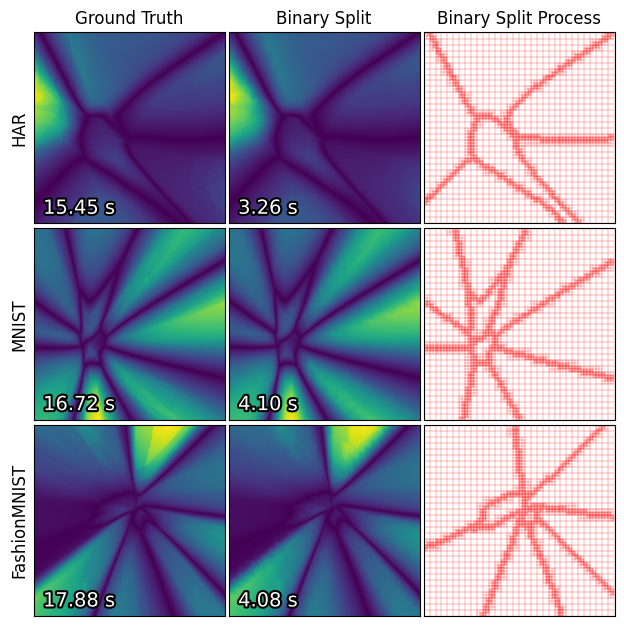

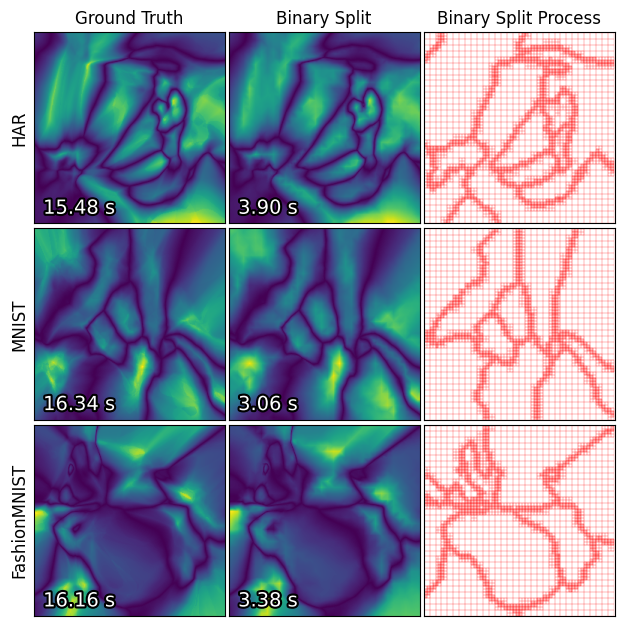

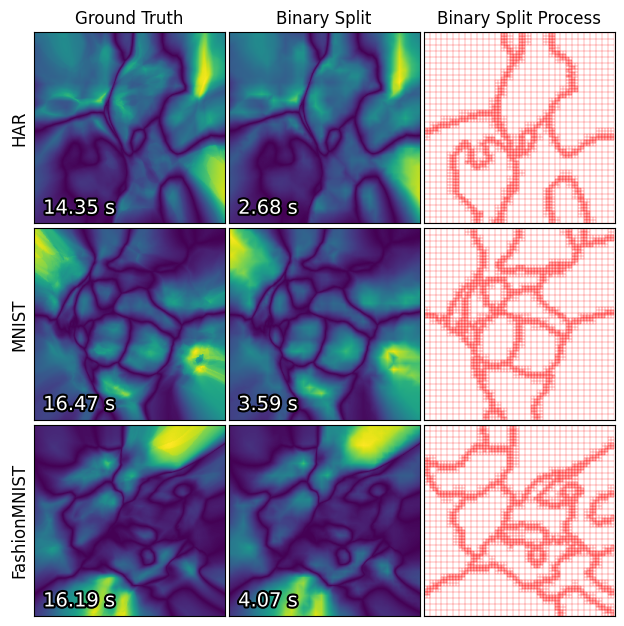

In [6]:
for ppinv_name in PPinv_names:
    fig = plot_dist_map(dataset_names, ppinv_name)
    fig.savefig(f'figures/dist2boundary_{ppinv_name}.eps'.replace(' ', ''), format='eps', bbox_inches='tight')